In [2]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
# import statsmodels.graphics.gofplots as sm
import scipy
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Confidence Intervals

## Standard errors are used to compute Confidence Intervals

The standard deviation measures the variability of a set of data: how much the data points are spread out around a mean.

The standard error of the mean meaures the variability of the sample means in a sampling distribution of means: how much the sample mean is spread out from the true mean.  

The standard error of the mean is a measure of the precision of the estimate of the mean from a sample to the true mean of the population.  The SEM is the standard deviaton of the sampling distribution of the sample means.  

SEM= $\sigma$ / $\sqrt{n}$.  You use the standard error of the mean in the computation of the confidence interval of the mean.

**The confidence interval** of the mean is the range of the estimate of the unknown mean, bounded by the lower bound and upper bound of the range and computed at a designated confidence level (often at a 95% confidence level).  The confidence interval for the true mean is: 

$\bar{x} - \frac{c_n*\sigma}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_n*\sigma}{\sqrt(n)}$.

- where $\bar{x}$ is the sample mean 
- where $c_n$ is the critical value of z using the standard normal probability distribution at a certain confidence level 
- where $\sigma$ is the known population standard deviation 
- where n is the sample size 
- where $\sigma$/$\sqrt{n}$ is the SEM

This is true when the distribution is normal.  For large sample sizes from other population distributions, the confidnece interval is approximately corrected by the Central Limit Theorem (the CLT causes the sampling distribution of the samples means from any distritbution to be normally approximated, at a sufficiently large sample size).

# Confidence Interval for Mean of One Sample and Known Population Standard Deviation
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius.   We will imagine a situation where we do not know the mean of the population but we do know the standard deviation of the population, $\sigma$=1.2.  We select a sample of sample size=n and find the sample mean =  $\bar{x}$.  

In [15]:
# n = 6 samples
data_BP=np.array([102.5,101.7,103.1,100.9,100.5,102.2])
mean_BP=np.mean(data_BP)
mean_BP

101.81666666666666

In [ ]:
# sample standard deviation
#np.std(data_BP,ddof=1)

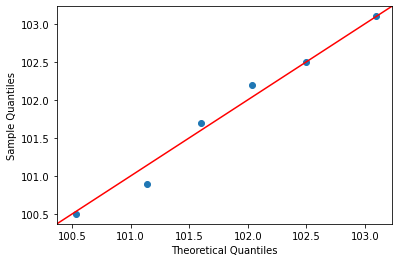

In [4]:
# let's first look at the distribution of the data
sm.qqplot(data_BP,line='45',loc=mean_BP,scale=1.2)
plt.show()

If the population distribution is normal or the sample size is sufficiently large, then can use the critical z value \
The mean of the sampling distribution of the mean is equal to the population mean. \
The standard error of the mean is equal to the $\sigma$ / ${\sqrt(n)}$.

In [105]:
# standard deviation = 1.2
SEM_BP=1.2/np.sqrt(6)
SEM_BP

0.48989794855663565

The selection of the CI determines the probability that the CI will contain the true mean value.  A common choice for the confidence level is 95%.  This is 0.95 probability of the area under the normal probability density curve covered or accounted for in future samples.  Probability areas outside of this area are less than 0.05.  Becasue the normal curve is symetric, half of this probability is on the lower tail and half on the upper tail. For a confidence interval of confidence level of C, the alpha level is 1-C and the area in each tail (for a two-tailed confidence level) is equal to (1-C)/2.

In [5]:
print(norm.ppf(0.025))
print(norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

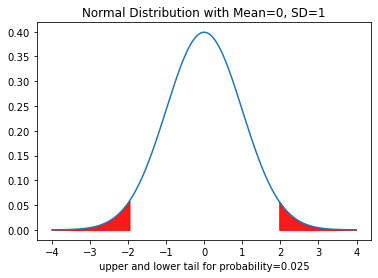

In [6]:
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax=sns.lineplot(x=x_A,y=normal_A)
ax=plt.fill_between(x_A,normal_A, where=(x_A <-1.96),color='r',alpha=.9)
ax=plt.fill_between(x_A,normal_A, where=(x_A >1.96),color='r',alpha=.9)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("Normal Distribution with Mean=0, SD=1")

The critical value from the standard normal distribution is the z value realizing the probability of observing a value at least as extreme as positive z, or the upper critical value.  For p=0.025, the upper critical z value such that P(Z>$/z_c$)=0.025 = 1.96.

In [7]:
# 95% CI calculation
# lower bound
print("Lower bound = " + str(mean_BP - 1.96 * 1.2/np.sqrt(6)))
# upper bound
print("Upper bound = " + str(mean_BP + 1.96 * 1.2/np.sqrt(6)))

Lower bound = 100.85646668749565
Upper bound = 102.77686664583767


In [9]:
# check with python conmputing
import statsmodels as sm
# statsmodels.stats.weightstats._zconfint_generic(mean,std_mean(standard error),alpha,alternative)
CI_BPz=sm.stats.weightstats._zconfint_generic(mean_BP,1.2/np.sqrt(6),0.05,alternative='two-sided')
print ("The 95% CI is = " + str(CI_BPz))

The 95% CI is = (100.8564843313956, 102.77684900193772)


In [10]:
norm.ppf(0.975,loc=mean_BP, scale=1.2/np.sqrt(6))

102.77684900193772

In [11]:
norm.ppf(0.025,loc=mean_BP, scale=1.2/np.sqrt(6))

100.8564843313956

# Confidence Interval for Mean of One Sample and Unknown Population Standard Deviation
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius. We now do not know the population mean or standard deviation, and so will estimate the from the sample.

We will calculate the 95% confidence intervals for the true mean using our sampled data. In cases where we want to estimate the true population mean and are estimating the standard deviation using the sample standard deviation we have to use the t-distribution to calculate our confidence intervals.

The confidence interval for the true mean for unknown standard deviation: \
$\bar{x} - \frac{c_t*s}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_t*s}{\sqrt(n)}$.

where $\bar{x}$ is the sample mean \
where $c_t$ is the critical value of t using the t probability distribution at a certain confidence level \
where s is the sample standrd deviation \
where n is the sample size 

This is true when the distribution is normal.  For large sample sizes from other population distributions, the confidnece interval is approximately corrected by the Central Limit Theorem (the CLT causes the sampling dstribution of the samples means from any dsirtbution to be normally approximated, at a sufficiently large sample size).

The t-distribution is described by the degrees of freedom. For a sample of size n, the t distribution will have n-1 degrees of freedom.  As sample size increases and the dof increase, the t distribution becomes approximately normal.

# Boiling point example
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius.  We do not know the mean of the population and we do not know the standard deviation of the population, $\sigma$=unknown.  We select a sample of sample size=n and find the sample mean =  $\bar{x}$ and the sample standard devation = s.

In [18]:
# n = 6 samples
data_BP=np.array([102.5,101.7,103.1,100.9,100.5,102.2])
mean_BP=np.mean(data_BP)
print("Sample mean = " + str(mean_BP))
std_BP=np.std(data_BP,ddof=1)
print("Sample std = " + str(std_BP))
print("SEM = " + str(std_BP/np.sqrt(6)))

Sample mean = 101.81666666666666
Sample std = 0.9847165412780786
SEM = 0.40200884456826363


Let's first calculate the $c_t$ values. The degrees of freedom is = n-1 for the t distribution.  You can find this on the t-table or this can be done using the [scipy.stats t library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

In [21]:
from scipy.stats import t
ct = t.ppf(0.975,df=5)
print("Critical value of t = " + str(ct))

Critical value of t = 2.5705818366147395


Text(0.5, 1.0, 't Distribution with dof=5')

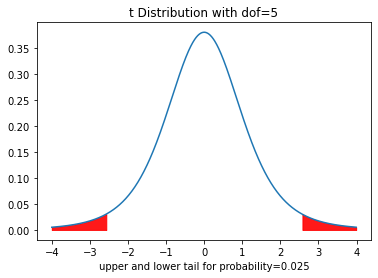

In [26]:
x_B = np.arange(-4,4,.01)
t_B=t.pdf(x_B,5)
ax=sns.lineplot(x=x_B,y=t_B)
ax=plt.fill_between(x_B,t_B, where=(x_B <-2.57),color='r',alpha=.9)
ax=plt.fill_between(x_B,t_B, where=(x_B >2.57),color='r',alpha=.9)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("t Distribution with dof=5")

The t-critical value is the number of standard errors above and below the mean that capture a given proportion of the sampling distribution of $\bar{x}$ for a given degrees of freedom. When we use a margin of error (margin of error = $\frac{c_t*s}{\sqrt(n)}$), it is to estimate the population parameter  μ . But we also don't know the population parameter  σ , so we estimate it with our sample standard deviation s. When we estimate both of these parameters using sample statistics, we obtain more variation in the sampling distribution than if we were to just estimate  μ. Hence we must use a t-distribution of degrees of freedom n−1 which accounts for the increased variability by increasing the area under the tails. When we calculate the margin of error, we are multiplying the standard error by the number of standard errors needed to capture  μ  a given proportion of the time (the t critical value).

In [52]:
LB = mean_BP-ct*std_BP/np.sqrt(6)
UB = mean_BP+ct*std_BP/np.sqrt(6)
print(str(LB) + " <= true mean= <= " +str(UB))

100.78327003266101 <= true mean= <= 102.85006330067232


In [53]:
# check with python computing
# statsmodels.stats.weightstats._tconfint_generic(mean,std_mean(standard error),dof,alpha,alternative)
CI_t=sm.stats.weightstats._tconfint_generic(mean_BP,std_BP/np.sqrt(6),5,0.05,alternative='two-sided')
print("95% CI = " + str(CI_t))

95% CI = (100.78327003266101, 102.85006330067232)


This 95% confidence interval we generated using our sample provides us with an estimated range of of values which we are confident contain the true mean of boiling point.  We are confident (at the 95% confidence level) that of all 95% confidence levels computed with this data, 95% of them would contain the true mean boing point.  

The confidence level puts represents the long-run proportion of corresponsing CIs that contain the true population mean. 

Since we are calculating a 95% confidence interval, if we were to repeat this process 20 times and calculate the confidence intervals for all of those times, we would expect 19 of the confidence interval ranges to contain the true mean.  Or 0.05 * 20=1 on average would be intervals not covering the true mean.

If we were to repeat this process 100 times....

# Simulated data for Boiling Point

What is the point estimate for the mean of the boiling point, $\mu$?

The best estimate is the expected value for the random varible of the mean of the boiling point (the unbiased estimator of the population mean).  We estimate this as the mean of a sample, $\bar{x}$.

How good is this estimate of $\bar{x}$?

The SEM of $\bar{x}$ gives you the variability of the sampling distribution of the sample means:  an estimate of the precision of your sample mean to the true mean. 

We will simulate some data with a known or true mean of 102 and a known or true std of 1.2.  We can then see if our sample confidence interval contains the true mean or does not.  

The true mean = 101.99803031204408
The true std = 1.1965316892260118


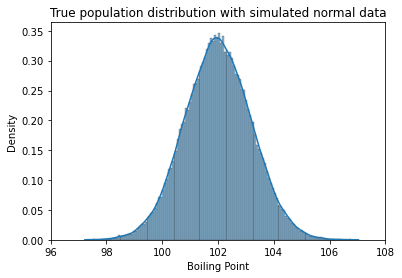

In [54]:
# simulated data for boiling point
fig, ax = plt.subplots()
normal_random_variables_BP=norm.rvs(102,1.2,size=100000)
ax=sns.histplot(normal_random_variables_BP,kde=True,stat='density',ax=ax)
ax.set_xlim(96,108)
ax.set_xlabel("Boiling Point")
ax.set_title("True population distribution with simulated normal data")

mean_BPall=np.mean(normal_random_variables_BP)
std_BPall=np.std(normal_random_variables_BP,ddof=1)
print("The true mean = " + str(mean_BPall))
print("The true std = " + str(std_BPall))

We will take a sample from this population of size = n = 10.  

The sample mean of 1 sample of size 10 = 102.17892292055951
The sample std of 1 sample of size 10 = 0.8020600216173241
The SEM of the sample mean of 1 sample of size 10 = 0.25363364884746314


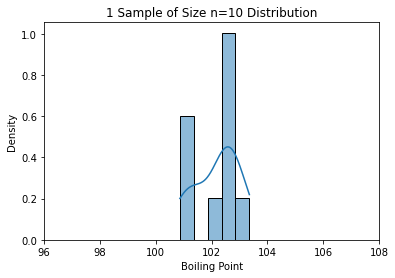

In [32]:
normal_random_variables_BP_10=norm.rvs(102,1.2,size=10)
fig, ax = plt.subplots()
sns.histplot(normal_random_variables_BP_10,kde=True,stat='density',ax=ax)
ax.set_xlim(96,108)
ax.set_xlabel("Boiling Point")
ax.set_title("1 Sample of Size n=10 Distribution")

mean_BP10=np.mean(normal_random_variables_BP_10)
std_BP10=np.std(normal_random_variables_BP_10,ddof=1)
print("The sample mean of 1 sample of size 10 = " + str(mean_BP10))
print("The sample std of 1 sample of size 10 = " + str(std_BP10))
print("The SEM of the sample mean of 1 sample of size 10 = " + str(std_BP10/np.sqrt(10)))

What we don't do but which is the basis of inferential statistics is to put this 1 sample that we have chosen into the context of a sampling distribution of the sample means of many sampling events. This represents the long-run proportion of sampling.  Let's simulate this by taking 100 samples from the population of n=10.    

In [35]:
mean_BP10B=[]
std_BP10B=[]
for i in range(1,100,1):
    normal_random_variables_BP_10A=norm.rvs(102,1.2,size=10)
    mean_BP10A=np.mean(normal_random_variables_BP_10A)
    std_BP10A=np.std(normal_random_variables_BP_10A)
    mean_BP10B.append(mean_BP10A)
    std_BP10B.append(std_BP10A)
    #print(mean_BP10A)

The mean of the sampling distribution of 100 sample means of size 10 = 101.98982930130447
The std of the sampling distribution of 100 sample means of size 10 = the SEM = 0.38228835914855863
The SEM of all samples means of size 10 = 0.3801922468658069


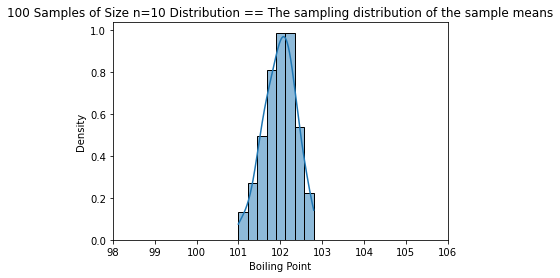

In [36]:
fig, ax = plt.subplots()
sns.histplot(mean_BP10B,kde=True, stat='density',ax=ax)
ax.set_xlim(98,106)
ax.set_xlabel("Boiling Point")
ax.set_title("100 Samples of Size n=10 Distribution == The sampling distribution of the sample means")

mean_BP10C=np.mean(mean_BP10B)
std_BP10C=np.std(mean_BP10B,ddof=1)
print("The mean of the sampling distribution of 100 sample means of size 10 = " + str(mean_BP10C))
print("The std of the sampling distribution of 100 sample means of size 10 = the SEM = " + str(std_BP10C))
print("The SEM of all samples means of size 10 = " + str((std_BPall/np.sqrt(10))))

According to the Central Limit Theorem (CLT), the distribution of sample means (the sampling distribution) should be nearly normal, even if the underlying population was not normal if the sample size is large enough. 

The mean of the sampling distribution should be approximately equal to the population mean ($\mu$ = 100) and the standard error (the standard deviation of sample means) should be approximately equal to the SD of the population divided by square root of sample size ($\sigma$/$\sqrt{10}$ = 1.2/$\sqrt{10}$ = 0.380). 

The SEM of $\bar{x}$ is estimated by using the sample standard deviation s, so s/$\sqrt{10}$.

# Using the SEM to calculate the Confidence Interval of the sample mean $\bar{x}$

Now that we have the SEM = s/$\sqrt{10}$, which is an estimate of precision or how close we are with the sample mean to the true mean, we can find the range of values that could include the true mean at a certain confidence level.  We can think of this as the accuracy of the sample mean estimate, or how often, over a long run of events, we cover the true mean.

The confidence interval for the true mean for unknown standard deviation: \
$\bar{x} - \frac{c_t*s}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_t*s}{\sqrt(n)}$.

The ${c_t}$ here can be found from a t-table or from python (with dof=n-1=9) = 2.262.

In [37]:
from scipy.stats import t
import statsmodels as sm
ctBP = t.ppf(0.975,df=9)
print("The critical value for t =" + str(ctBP))

The critical value for t =2.2621571627409915


For the 1 sample taken above we can find the 95% confidence interval around the sample mean (2-sided). 

In [38]:
LB_BP = mean_BP10-ctBP*std_BP10/np.sqrt(10)
UB_BP = mean_BP10+ctBP*std_BP10/np.sqrt(10)
print(str(LB_BP) + " <= true mean= <= " +str(UB_BP))
print("check with python = " + str(sm.stats.weightstats._tconfint_generic(mean_BP10,std_BP10/np.sqrt(10),9,0.05,alternative='two-sided')))

101.60516374510709 <= true mean= <= 102.75268209601194
check with python = (101.60516374510709, 102.75268209601194)


We are 95% confident that the interval calculated contains the true mean of 102.

We can put this into the context of future, as yet undone, samples.  This puts the confidence on the estimation procedure of the sampling calculation, not on the specific interval found.  

This means that there is a 95% probability that the 95% confidence intervals calculated from future samples will cover the true mean. Or in frequentist terms that for future samples, 95% of the confidence intervals calculated will cover the true mean.  

The specific confidence interval found either has or does not have the true mean within it. The probability of the interval covering the true mean is either 1 or 0 once the interval is calulated.  The probability relates to the estimation procedure of the sampling calculation. 

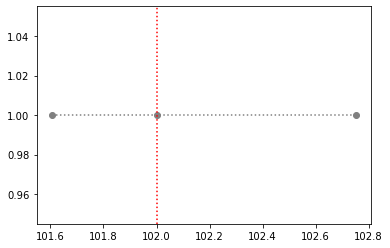

In [42]:
xvalues_10=[LB_BP,102,UB_BP]
yvalues_10=[1,1,1]
plt.plot(xvalues_10, yvalues_10,":",color="grey",marker="o");
plt.axvline(x=102,color="red", linestyle=":")

Does the confidence interval found from our single sample CI contain the true mean?

What if we took another 95% CI from another sample?

We will take the CIs for each of the 100 samples that we found above and plot each one:

In [43]:
ciU=[]
ciL=[]
ciU = (mean_BP10B)+((ctBP)*((std_BP10B)/np.sqrt(10)))
ciL = (mean_BP10B)-((ctBP)*((std_BP10B)/np.sqrt(10)))
ci_all=pd.DataFrame([ciL,ciU])
ci_all=ci_all.transpose()
ci_all

,0,1
0,100.581467,102.263553
1,100.976421,102.781591
2,100.550921,102.042785
3,101.902031,103.392352
4,101.601202,102.925355
...,...,...
94,100.625101,102.219228
95,101.715612,102.842725
96,101.427978,102.899961
97,101.447489,103.150387


What CI do not cover the true mean?  Let's filter out the CIs that do not. 

How many do you expect to not contain the true mean?

In [48]:
ci_all_Q=ci_all[ ( (ci_all[0]<102) & (ci_all[1]<102) ) | ( (ci_all[0]>102) & (ci_all[1]>102) ) ]
ci_all_Q

,0,1
14,101.015003,101.951814
28,102.038648,103.459757
50,101.286987,101.668351
81,100.249357,101.934496
83,100.007760,101.985247
90,100.514662,101.968760


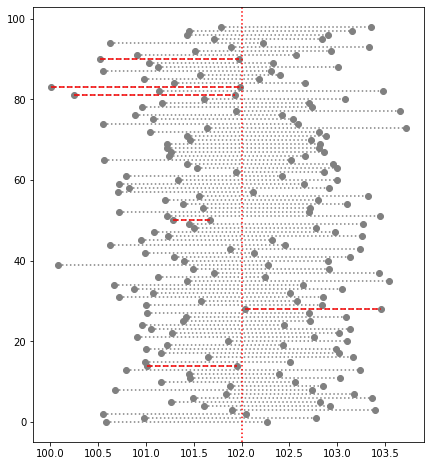

In [49]:
#sns.scatterplot(data=ci_all)
from matplotlib.pyplot import figure
figure(figsize=(7,8))
xvalues=[ci_all[0],ci_all[1]]
yvalues=[range(0,99,1),range(0,99,1)]
plt.plot(xvalues, yvalues,":",color="grey",marker="o");
plt.axvline(x=102,color="red",linestyle=":")
xAvalues=[ci_all_Q[0],ci_all_Q[1]]
yAvalues=[ci_all_Q.index,ci_all_Q.index]
plt.plot(xAvalues,yAvalues,"--",color="red");

How many did we find out of the 100 confidence intervals that did not contain the true known mean of 102?

Let's look at it all together:

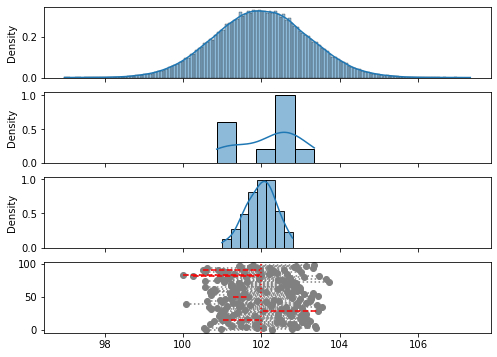

In [51]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(4,sharex=True,figsize=(8,6))
ax[1]=sns.histplot(normal_random_variables_BP_10,kde=True,stat='density',ax=ax[1])
ax[0]=sns.histplot(normal_random_variables_BP,kde=True,stat='density',ax=ax[0])
ax[2]=sns.histplot(mean_BP10B,kde=True, stat='density',ax=ax[2])
xvalues=[ci_all[0],ci_all[1]]
yvalues=[range(0,99,1),range(0,99,1)]
ax[3]=plt.plot(xvalues, yvalues,":",color="grey",marker="o");
ax[3]=plt.axvline(x=102,color="red",linestyle=":")
xAvalues=[ci_all_Q[0],ci_all_Q[1]]
yAvalues=[ci_all_Q.index,ci_all_Q.index]
ax[3]=plt.plot(xAvalues,yAvalues,"--",color="red");

The top plot is the population showing the true mean and standard deviation.

The 2nd plot is a sample of n=10 with a sample mean and sample standard deviation.  The SEM is the s/$\sqrt{10}$ and shows how close the sample mean comes to estimating the true mean.

The 3rd plot is the sampling distribution of the sample means.

The 4th plot shows the 95% CI calculated from 100 samples, with those that do not contain the true mean shown in red.

We are 95% confident that our interval (the particular interval from our particular sample) contains the population mean boling point.

If we created 100 confidence intervals of the same size from the same population, we would expect 95 of them to contain the true parameter (the population mean). We also expect five of the intervals would not contain the parameter.